# <font color='green'>**Libraries, Functions and Random Seeds**</font>


In [1]:
import numpy as np
import tensorflow as tf
import keras

import random

from keras import Sequential
from keras.layers import Input, Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from scipy.stats import beta
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import sys
from google.colab import files, drive

In [2]:
seed_value = 42

# python
random.seed(seed_value)
# numpy
np.random.seed(seed_value)
# tensorflow
tf.random.set_seed(seed_value)

In [3]:
# Uncomment when importing from GitHub
!git clone https://www.github.com/MorgilloR/time-varying-channels.git
%cd /content/time-varying-channels
dir = '/content/time-varying-channels'

# Uncomment when importing from Google Drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/'Colab Notebooks'/time-varying-channels/
#dir = '/content/drive/MyDrive/"Colab Notebooks"/time-varying-channels'

sys.path.append(dir)
from tvc import *

Cloning into 'time-varying-channels'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 7.93 KiB | 7.93 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/time-varying-channels


# <font color='red'>**Classification**</font>

In [ ]:
# Parameters
sequence_length = 20  # Length of the input sequence
dataset_size = 10000  # Number of dataset samples
r = 1
alpha_min = 1
alpha_max = 10
beta_min = 1
beta_max = 10

In [ ]:
X_0 = np.zeros((dataset_size, sequence_length))
y_0 = np.ones(dataset_size) * 0

# Fill in the dataset
for i in range(dataset_size):
    #eta_bar = np.random.uniform(0, 1)
    #sigma = np.random.uniform(0, min(eta_bar*(1 - eta_bar)/(1 + 1/eta_bar),
    #                                  eta_bar*(1 - eta_bar)/(1 + 1/(1-eta_bar))))
    alpha = np.random.uniform(alpha_min, alpha_max)
    beta = np.random.uniform(beta_min, beta_max)
    eta_bar = mean_from_alpha_and_beta(alpha, beta)
    sigma = variance_from_alpha_and_beta(alpha, beta)

    eta_sequence = memoryless(eta_bar, sigma, sequence_length)

    X_0[i] = eta_sequence


X_1 = []
y_1 = np.ones(dataset_size) * 1

for i in range(dataset_size):
    #eta_bar = np.random.uniform(0, 1)
    #variance = np.random.uniform(0, min(
    #    eta_bar*(1 - eta_bar)/(1 + 1/eta_bar), eta_bar*(1 - eta_bar)/(1 + 1/(1-eta_bar))))
    alpha = np.random.uniform(alpha_min, alpha_max)
    beta = np.random.uniform(beta_min, beta_max)
    eta_bar = mean_from_alpha_and_beta(alpha, beta)
    variance = variance_from_alpha_and_beta(alpha, beta)
    mu = np.random.uniform(0.2, 6/11) ####
    eta_sequence = non_markovian(eta_bar, variance, mu, sequence_length)
    X_1.append(eta_sequence)


X_2 = []
y_2 = np.ones(dataset_size) * 2

for i in range(dataset_size):
    #eta_bar = np.random.uniform(0, 1)
    #variance = np.random.uniform(0, min(
    #    eta_bar*(1 - eta_bar)/(1 + 1/eta_bar), eta_bar*(1 - eta_bar)/(1 + 1/(1-eta_bar))))
    alpha = np.random.uniform(alpha_min, alpha_max)
    beta = np.random.uniform(beta_min, beta_max)
    eta_bar = mean_from_alpha_and_beta(alpha, beta)
    variance = variance_from_alpha_and_beta(alpha, beta)
    mu = np.random.uniform(0.1, 1)
    eta_sequence = markovian(eta_bar, variance, mu, sequence_length)
    X_2.append(eta_sequence)


X_3 = np.zeros((dataset_size, sequence_length))
y_3 = np.ones(dataset_size) * 3

# Fill in the dataset
for i in range(dataset_size):
    #eta_bar = np.random.uniform(0, 1)
    #sigma = np.random.uniform(0, min(
    #    eta_bar*(1 - eta_bar)/(1 + 1/eta_bar), eta_bar*(1 - eta_bar)/(1 + 1/(1-eta_bar))))
    alpha = np.random.uniform(alpha_min, alpha_max)
    beta = np.random.uniform(beta_min, beta_max)
    eta_bar = mean_from_alpha_and_beta(alpha, beta)
    variance = variance_from_alpha_and_beta(alpha, beta)

    eta_sequence = compound(eta_bar, sigma, sequence_length)

    X_3[i] = eta_sequence


# Parameters
a_min, a_max = 0, 0.5  # Range for a
b_min, b_max = 0, 0.5  # Range for b
Delta_exp_min, Delta_exp_max = 10, 30
Delta_cos_min, Delta_cos_max = 1, 10

X_4 = np.zeros((dataset_size, sequence_length))
y_4 = np.ones(dataset_size) * 4

for i in range(dataset_size):
    a = np.random.uniform(a_min, a_max)
    b = np.random.uniform(b_min, b_max)

    # Generate a full sequence of eta_k values
    eta_sequence = deterministic(a, b, sequence_length, i, Delta_exp_min,
                                 Delta_exp_max, Delta_cos_min, Delta_cos_max)
    X_4[i] = eta_sequence

In [ ]:
X_values = [X_0, X_1, X_2, X_3, X_4]
y_values = [y_0, y_1, y_2, y_3, y_4]


input_data = []
for X in X_values:
    input_data.append(np.array([[diag_cov_matrix(eta_k, r) for eta_k in sample]
                                for sample in X]))

# Stack the results into a single array
input_data = np.vstack(input_data)

# Concatenate the y values
output_data = np.concatenate(y_values)

# Number of classes
num_classes = 5

# Ensure output_data is an integer array
output_data = output_data.astype(int)
# One-hot encode the labels
one_hot_labels = np.eye(num_classes)[output_data]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_data, one_hot_labels,
  test_size=0.2, random_state=42, stratify=np.argmax(one_hot_labels, axis=1))

### <font color='teal'>**Random Forest**</font>

In [ ]:
# Instantiate the model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("Accuracy on Test Set:", accuracy_score(y_true, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.75      0.49      0.59      2000
           1       0.78      0.39      0.52      2000
           2       0.78      0.23      0.36      2000
           3       0.98      1.00      0.99      2000
           4       0.98      0.94      0.96      2000

   micro avg       0.89      0.61      0.72     10000
   macro avg       0.85      0.61      0.68     10000
weighted avg       0.85      0.61      0.68     10000
 samples avg       0.61      0.61      0.61     10000

Accuracy on Test Set: 0.7036


### <font color='teal'>**FFNN**</font>

In [ ]:
# Reshape X_train and X_test to include the feature dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_shuffled = np.array([np.random.permutation(seq) for seq in X_train])
X_test_shuffled = np.array([np.random.permutation(seq) for seq in X_test])

model = Sequential()
model.add(Input(shape=(sequence_length,1)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
#model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=1000,
                    validation_data=(X_test, y_test))

Epoch 1/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2037 - loss: 1.7133 - val_accuracy: 0.3135 - val_loss: 1.5244
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3111 - loss: 1.4948 - val_accuracy: 0.3747 - val_loss: 1.2622
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4305 - loss: 1.2323 - val_accuracy: 0.6033 - val_loss: 0.9558
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5980 - loss: 0.9570 - val_accuracy: 0.6609 - val_loss: 0.7687
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6463 - loss: 0.8269 - val_accuracy: 0.6608 - val_loss: 0.8291
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6509 - loss: 0.8187 - val_accuracy: 0.6972 - val_loss: 0.6739
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6903 - loss: 0.7015 - val_accuracy: 0.7094 - val_loss: 0.7022
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6919 - loss: 0.7236 - val_accuracy: 0.

KeyboardInterrupt: 

### <font color='teal'>**1DCNN**</font>

In [ ]:
model = Sequential()
model.add(Input(shape=(sequence_length, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=1000,
                    validation_data=(X_test, y_test))

Epoch 1/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.2012 - loss: 1.6094 - val_accuracy: 0.2062 - val_loss: 1.6074
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2195 - loss: 1.6066 - val_accuracy: 0.3479 - val_loss: 1.6018
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2777 - loss: 1.5988 - val_accuracy: 0.3107 - val_loss: 1.5825
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3286 - loss: 1.5708 - val_accuracy: 0.3695 - val_loss: 1.5101
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3411 - loss: 1.4904 - val_accuracy: 0.3453 - val_loss: 1.4206
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3782 - loss: 1.3761 - val_accuracy: 0.4267 - val_loss: 1.2752
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4209 - loss: 1.2670 - val_accuracy: 0.4086 - val_loss: 1.2401
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4295 - loss: 1.2125 - val_accuracy: 0.

### <font color='teal'>**RNN**</font>

In [ ]:
# Reshape X_train and X_test to include the feature dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Input(shape=(sequence_length,1)))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=800, batch_size=1000,
                    validation_data=(X_test, y_test))

Epoch 1/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.2474 - loss: 1.5904 - val_accuracy: 0.2984 - val_loss: 1.5054
Epoch 2/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.3112 - loss: 1.4890 - val_accuracy: 0.3332 - val_loss: 1.4427
Epoch 3/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.3455 - loss: 1.4311 - val_accuracy: 0.3930 - val_loss: 1.3668
Epoch 4/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.3975 - loss: 1.3621 - val_accuracy: 0.5069 - val_loss: 1.2398
Epoch 5/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4746 - loss: 1.2404 - val_accuracy: 0.5683 - val_loss: 1.0708
Epoch 6/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.5381 - loss: 1.1060 - val_accuracy: 0.5683 - val_loss: 1.0080
Epoch 7/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.5662 - loss: 1.0316 - val_accuracy: 0.6260 - val_loss: 0.9126
Epoch 8/800
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.5957 - loss: 0.9675 - val_a

In [ ]:
#model.save('class2.h5')
#model.save('class2.keras')
model = keras.models.load_model('best_model.h5')
#np.save('X_test_class2.npy', X_test)  # Save the test data
#np.save('y_test_class2.npy', y_test)  # Save the test labels
#X_test = np.load('X_test_class.npy')  # Load the test data
#y_test = np.load('y_test_class.npy')  # Load the test labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy on Test Set: 0.8983


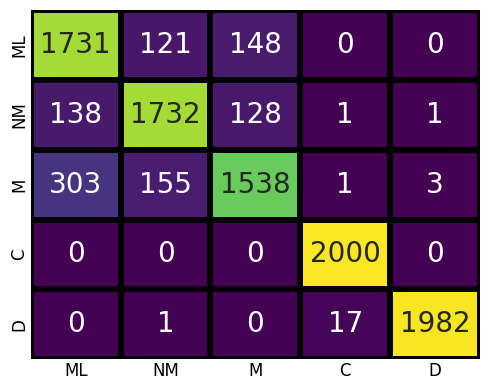

In [ ]:
# Step 1: Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)  # Model prediction (converts one-hot predictions to class indices)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot test labels to class indices

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=palette, xticklabels=['ML', 'NM', 'M', 'C', 'D'],
    yticklabels=['ML', 'NM', 'M', 'C', 'D'], annot_kws={"size": 20}, linewidths=3,
    linecolor='black', cbar=False)

plt.gca().tick_params(axis='both', length=4, width=1, pad=2)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.show()

plt.savefig("cm2.pdf",\
            bbox_inches='tight', pad_inches=0.25, format="pdf")
files.download("cm2.pdf")
# Print evaluation metrics
print("Accuracy on Test Set:", accuracy_score(y_true, y_pred))

### Performance

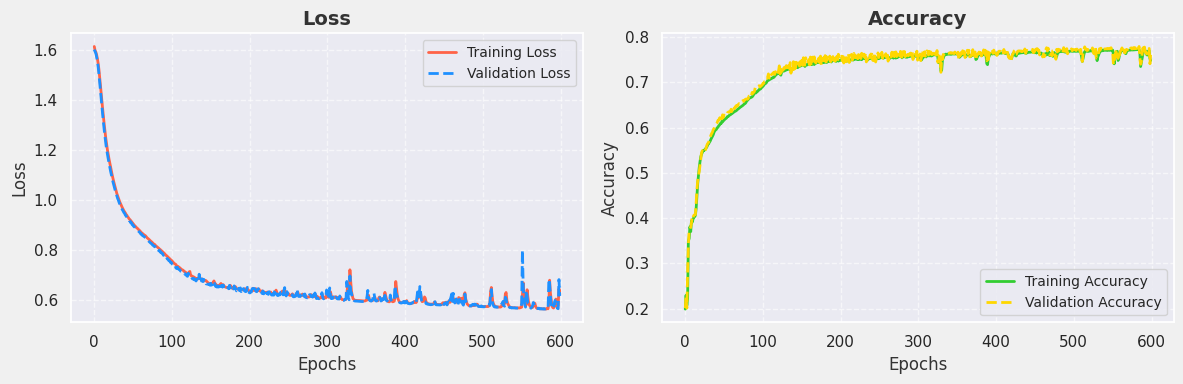

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(12, 4), facecolor='#f0f0f0')

# Plot Loss
ax[0].plot(history.history['loss'], label='Training Loss', color='#FF6347', linewidth=2)
ax[0].plot(history.history['val_loss'], label='Validation Loss', color='#1E90FF', linestyle='--', linewidth=2)
ax[0].set_title('Loss', fontsize=14, fontweight='bold', color='#333333')
ax[0].set_xlabel('Epochs', fontsize=12, color='#333333')
ax[0].set_ylabel('Loss', fontsize=12, color='#333333')
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Plot Accuracy
ax[1].plot(history.history['accuracy'], label='Training Accuracy', color='#32CD32', linewidth=2)
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='#FFD700', linestyle='--', linewidth=2)
ax[1].set_title('Accuracy', fontsize=14, fontweight='bold', color='#333333')
ax[1].set_xlabel('Epochs', fontsize=12, color='#333333')
ax[1].set_ylabel('Accuracy', fontsize=12, color='#333333')
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()